# UNAD

# Realizado por: 
1. Juliana Alejandra Diaz
2. Danna Geraldine Garcia
3. Alixon Xiomara Sánchez

# Agrupamiento en Hierarchical Clustering

# Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenidos
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargar el conjunto de datos en la variable data
Datos = pd.read_csv ("C:/Users/JULIANA DIAZ/Downloads/Mall_Customers.csv")

In [4]:
# Se realiza lectura de los datos para el analisis exploratorio
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Descripcion de los datos del Mall
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


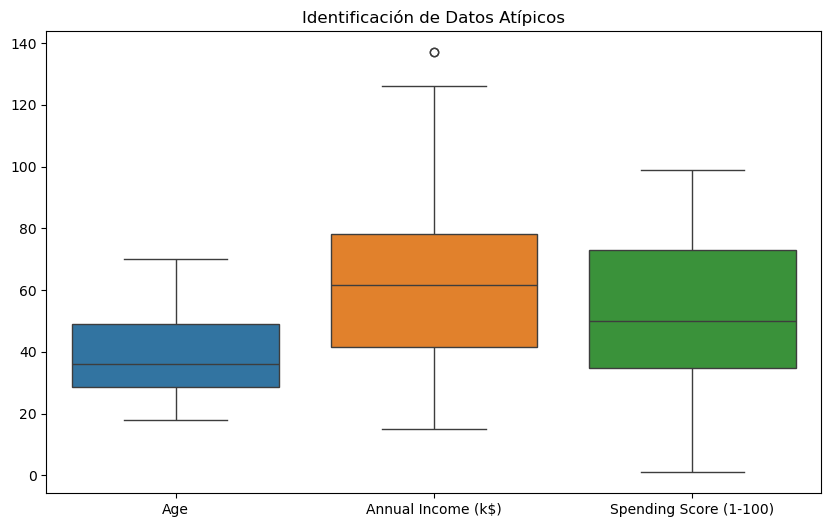

In [7]:
# Identificación de Datos Atípicos y Faltantes

# Boxplot para detectar outliers(Valores Atipicos)
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Identificación de Datos Atípicos")
plt.show()

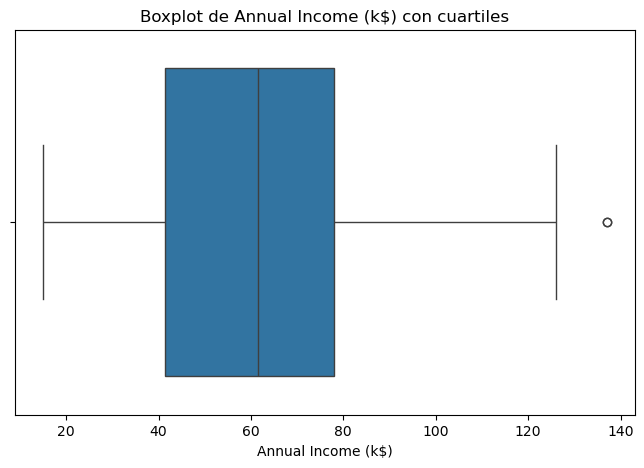

In [8]:
# Observamos que en la columna 'Annual Income (k$) tiene valores Atípicos (Outliers)

plt.figure(figsize=(8, 5))
sns.boxplot(data=Datos, x='Annual Income (k$)')
plt.title("Boxplot de Annual Income (k$) con cuartiles")
plt.xlabel("Annual Income (k$)")
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
# Calculando los cuartiles y el rango intercuartil (IQR)
Q1 = Datos['Annual Income (k$)'].quantile(0.25)
Q3 = Datos['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango intercuartil (IQR):", IQR)

Primer cuartil (Q1): 41.5
Tercer cuartil (Q3): 78.0
Rango intercuartil (IQR): 36.5


In [10]:
# Filtrando valores atípicos
outliers = Datos[Datos['Annual Income (k$)'] > 132.75]
print(outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [11]:
Datos_sin_outliers = Datos[Datos['Annual Income (k$)'] <= 132.75]

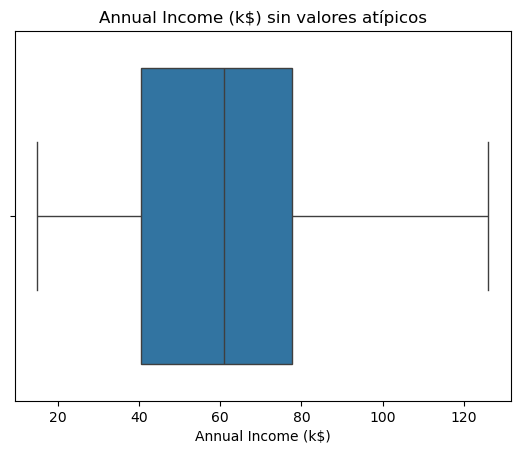

In [12]:
# Verificando que se eliminaron correctamente los valores atípicos para 'Annual Income (k$)'
sns.boxplot(data=Datos_sin_outliers, x='Annual Income (k$)')
plt.title("Annual Income (k$) sin valores atípicos")
plt.xlabel("Annual Income (k$)")
plt.show()

In [13]:
# Verificar valores faltantes en cada columna de mi Mall
Datos.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
#Revisión de Tipo de Datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Caracteristicas de Interes para el Agrupamiento:

1. Age
2. Annual Income (k$)
3. Spending Score (1-100)00)00)

In [15]:
# Filtrando Columnas del Modelo
Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [16]:
# Revisión de los Datos con las Variables Objetivo
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


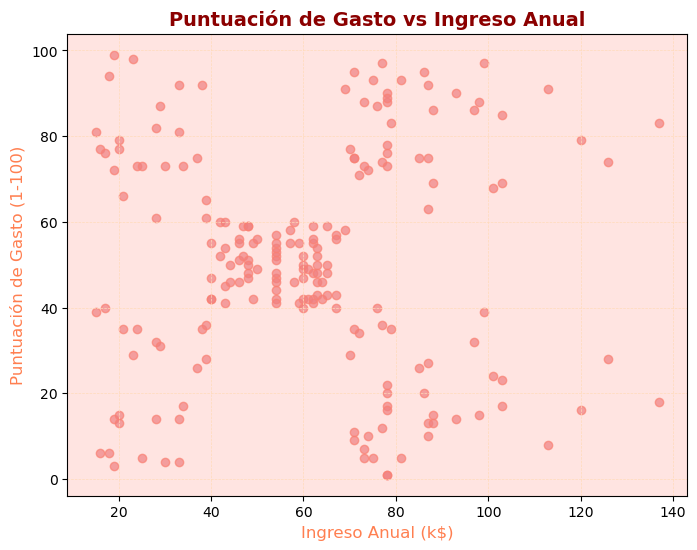

In [17]:
# Graficamos antes del agrupamiento

plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], color='lightcoral', alpha=0.7, edgecolors='salmon')

plt.xlabel('Ingreso Anual (k$)', color='coral', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', color='coral', fontsize=12)
plt.title('Puntuación de Gasto vs Ingreso Anual', color='darkred', fontsize=14, fontweight='bold')

plt.gca().set_facecolor('mistyrose')  
plt.grid(color='peachpuff', linestyle='--', linewidth=0.5)

plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]])

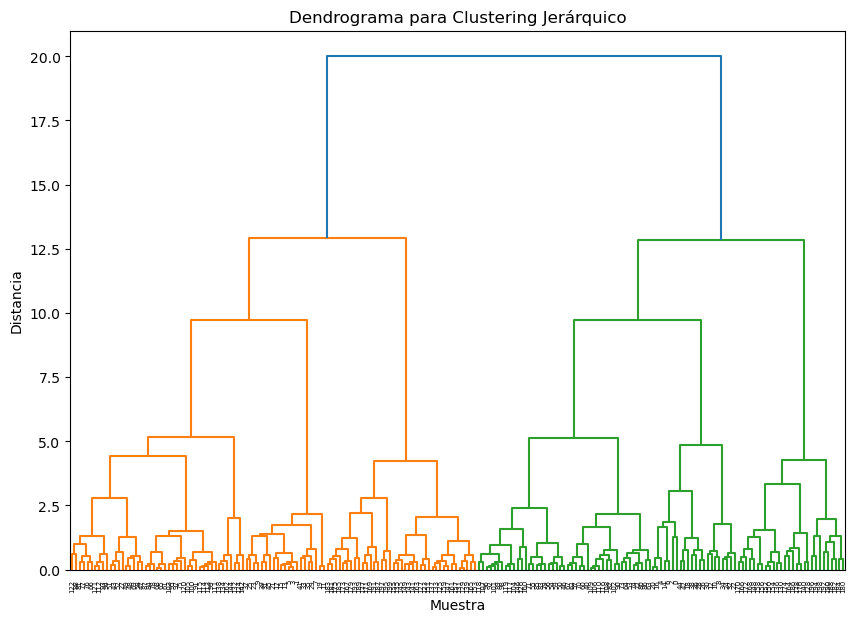

In [7]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestra')
plt.ylabel('Distancia')
plt.show()

# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

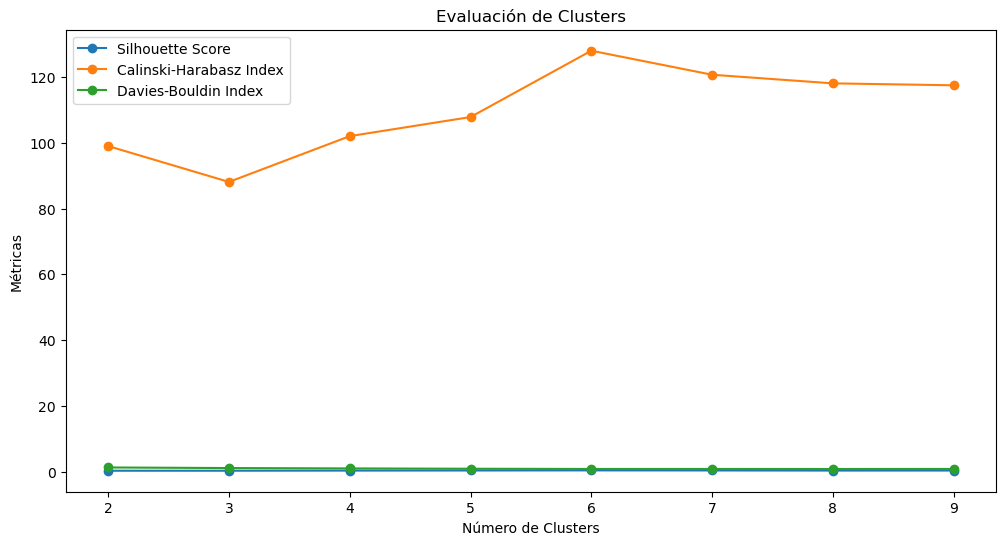

In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Probar diferentes números de clusters
clusters_range = range(2, 10)
sil_scores = []
ch_scores = []
db_scores = []

for k in clusters_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_data)
    
    sil_scores.append(silhouette_score(scaled_data, labels))
    ch_scores.append(calinski_harabasz_score(scaled_data, labels))
    db_scores.append(davies_bouldin_score(scaled_data, labels))

# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(clusters_range, sil_scores, marker='o', label='Silhouette Score')
plt.plot(clusters_range, ch_scores, marker='o', label='Calinski-Harabasz Index')
plt.plot(clusters_range, db_scores, marker='o', label='Davies-Bouldin Index')
plt.xlabel('Número de Clusters')
plt.ylabel('Métricas')
plt.legend()
plt.title('Evaluación de Clusters')
plt.show()

In [33]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]] = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]].fillna(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=6, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.4201169558789579
Índice de Calinski-Harabasz: 127.98645433956887
Índice de Davies-Bouldin: 0.8521020845733146


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

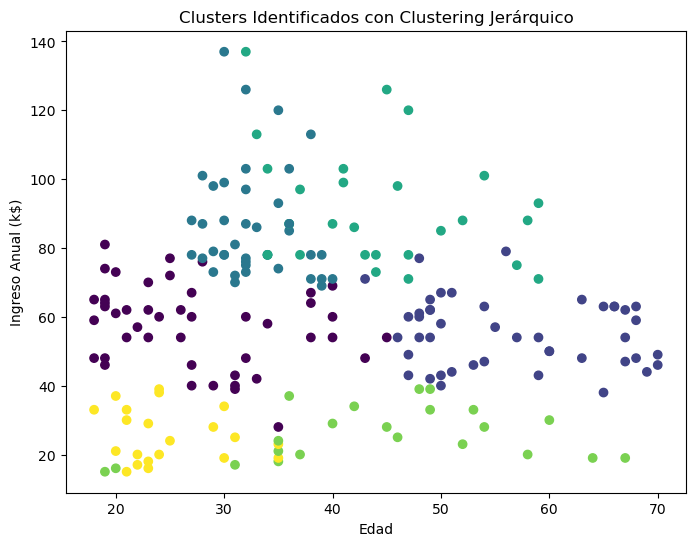

In [17]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=6)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

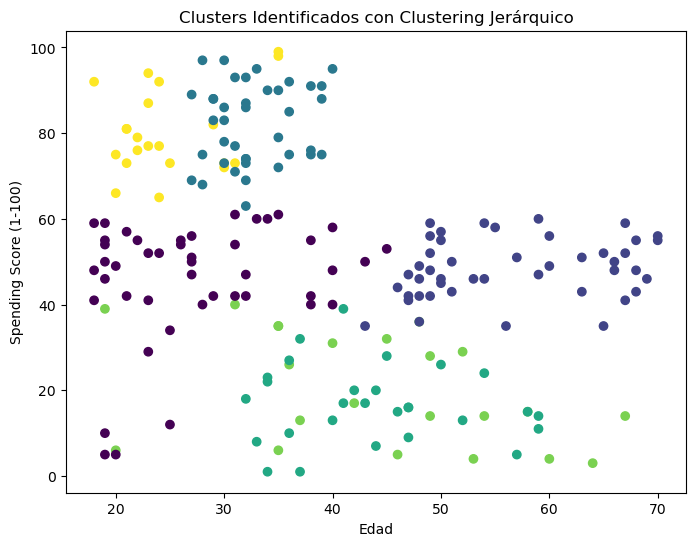

In [34]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=6)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()

Silhouette Score: 0.4201169558789579


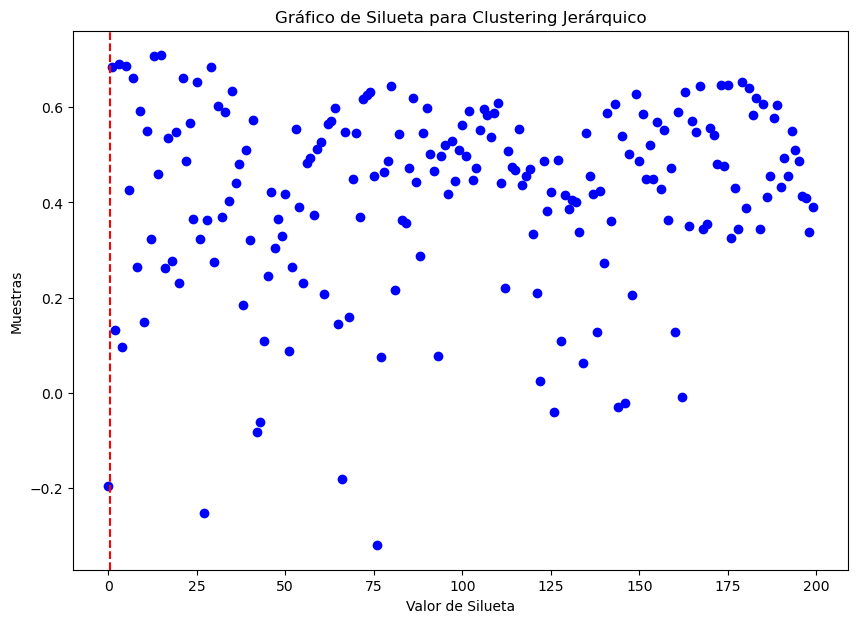

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

# 7. Interpretar, analizar y documentar los resultados obtenidos

1. El dendrograma muestra una estructura de agrupamiento clara con una jerarquía bien definida. Esto proporciona una base útil para clasificar a los clientes en diferentes segmentos, lo que podría tener aplicaciones prácticas en la personalización de servicios o en el desarrollo de estrategias de retención y adquisición de clientes.
2. Coeficiente de Silhouette 0.42: Un valor cercano a 0.42 indica una separación moderada entre clusters. Aunque no es extremadamente alto, este valor sugiere que la mayoría de los puntos están mejor asignados a sus respectivos clusters, aunque algunos puntos pueden estar cercanos a los límites entre clusters.
3. Índice de Calinski-Harabasz 127.98: Un valor cercano a 127.98 indica que los clusters formados con 6 grupos están bastante bien definidos. Esto refuerza la idea de que, con esta cantidad de clusters, los puntos de datos están distribuidos de manera razonablemente compacta dentro de cada cluster y bien separados entre los clusters.
4. Índice de Davies-Bouldin 0.85: Un valor de 0.85 es relativamente bajo, sugiriendo que los clusters están compactos y bien separados unos de otros.
5. Este análisis de edad e ingreso anual en el gráfico revela seis clusters de personas con características similares. Los jóvenes suelen tener ingresos bajos, mientras que los ingresos altos están distribuidos entre personas de diferentes edades, especialmente en el grupo intermedio. Cada cluster tiene particularidades: unos agrupan a jóvenes con ingresos bajos, otros a mayores con ingresos moderados, y algunos a individuos con ingresos altos y edades variadas. Esto demuestra que la edad no determina directamente el nivel de ingreso.
6. Este análisis muestra cómo las personas se agrupan en seis clusters según su edad y Spending Score (puntaje de gasto), revelando patrones interesantes de comportamiento. Por ejemplo, las personas jóvenes tienden a tener un puntaje de gasto alto, mientras que los mayores presentan un puntaje más bajo. Cada cluster tiene características únicas: algunos agrupan a jóvenes con puntajes altos, mientras que otros representan personas mayores con un gasto reducido.
7. Silhouette Score 0.42: Un Silhouette Score de 0.42 es funcional y muestra cierta estructura en los datos, aunque no es la separación ideal. La interpretación depende también de los otros índices (como el Calinski-Harabasz y Davies-Bouldin, que sugerían una buena cohesión y separación), así que en conjunto, la configuración de 6 clusters sigue siendo adecuada.